# **EA SPORTS의 글로벌 축구게임 FIFA 2022의 선수 데이터 분석하기**

출처: https://www.kaggle.com/cashncarry/fifa-22-complete-player-dataset?select=teams_fifa22.csv

**(1) 기본 설정하기**

In [1]:
# 필요한 모듈 삽입하기
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/fifa22/players_fifa22.csv')
display(df.head(2),df.tail(2))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,Positions,BestPosition,Club,ValueEUR,WageEUR,ReleaseClause,ClubPosition,ContractUntil,ClubNumber,ClubJoined,OnLoad,NationalTeam,NationalPosition,NationalNumber,PreferredFoot,IntReputation,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,0,2219,462,"RW,ST,CF",RW,Paris Saint-Germain,78000000,320000,144300000,RW,2023.0,30.0,2021,False,Argentina,RW,10.0,Left,5,4,4,Medium,Low,85,92,91,95,34,65,85,...,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,92,92,93,93,93,92,93,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,0,2212,460,ST,ST,FC Bayern München,119500000,270000,197200000,ST,2023.0,9.0,2014,False,Poland,ST,9.0,Right,5,4,4,High,Medium,78,92,79,85,44,82,71,...,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,92,85,88,88,88,85,89,87,83,87,67,69,67,64,63,64,22


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,Positions,BestPosition,Club,ValueEUR,WageEUR,ReleaseClause,ClubPosition,ContractUntil,ClubNumber,ClubJoined,OnLoad,NationalTeam,NationalPosition,NationalNumber,PreferredFoot,IntReputation,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
19246,245024,Wang Shilong,Shilong Wang,20,177,64,https://cdn.sofifa.com/players/245/024/22_60.png,China PR,47,60,13,1178,241,CB,CB,Guangzhou Evergrande Taobao FC,110000,2000,245000,SUB,2022.0,20.0,2020,False,Not in team,NaN,NaN,Right,1,3,2,Medium,High,61,23,27,32,52,46,25,...,62,49,41,81,34,72,62,37,21,41,51,27,30,39,41,53,54,52,8,8,11,12,9,34,32,32,32,32,32,33,36,35,36,47,44,47,49,49,49,15
19247,259737,H. Singh,Haobam Singh,18,170,62,https://cdn.sofifa.com/players/259/737/22_60.png,India,47,64,17,1371,283,CM,CAM,SC East Bengal FC,120000,500,333000,RES,2025.0,44.0,2020,False,Not in team,NaN,NaN,Right,1,2,2,Medium,Low,63,38,44,48,43,47,36,...,63,69,48,70,44,60,61,35,41,57,45,49,47,41,44,39,43,41,14,12,15,14,6,47,47,46,46,46,47,49,49,49,49,49,48,49,49,47,49,18


In [3]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [4]:
# column의 갯수가 무려 90개나 된다.
df.columns.size

90

In [5]:
# 데이터프레임 정보 확인하고 결측값 확인 
# df.info()
df.isna().sum().sort_values(ascending=False)[:10]

NationalPosition     18491
NationalNumber       18491
ClubNumber              70
ContractUntil           70
ClubPosition            70
DefensiveWorkRate        0
PreferredFoot            0
IntReputation            0
WeakFoot                 0
SkillMoves               0
dtype: int64

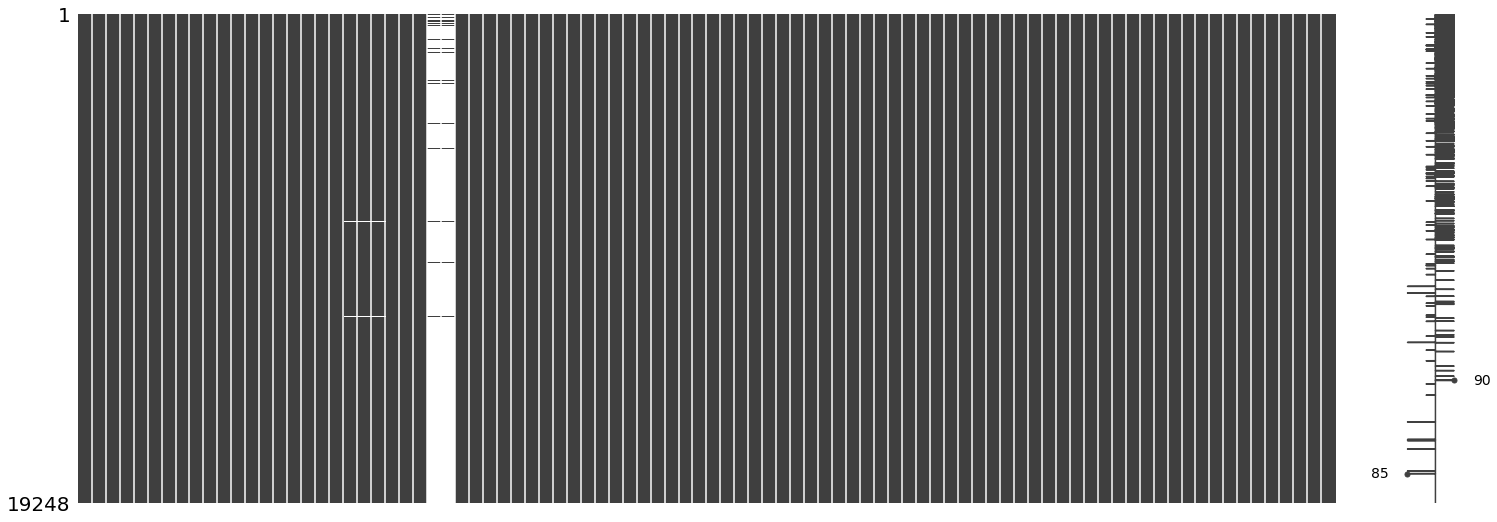

In [6]:
# 결측값 시각화하기 => missingno 사용 
msno.matrix(df, figsize=(25,9)) # => 5개의 컬럼에서 결측값이 존재(ClubPosition, ContractUntil, ClubNumber, NationalPosition, NationalNumber) 

In [7]:
# 수치형 데이터의 통계를 확인 
df.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,ReleaseClause,ContractUntil,ClubNumber,ClubJoined,NationalNumber,IntReputation,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,1.924800e+04,19248.000000,1.924800e+04,19178.000000,19178.000000,19248.000000,757.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000,19248.000000
mean,231630.754104,25.187448,181.298732,74.932980,65.769223,71.097672,5.328450,1597.149886,356.778990,2.854488e+06,8858.094347,5.090857e+06,2022.765304,20.966472,2019.311149,12.549538,1.093101,2.945501,2.352816,67.879936,53.460879,57.792654,62.967841,50.038342,64.639339,49.575384,45.867623,51.789744,58.868714,42.434954,55.663913,47.251507,42.219192,53.070605,58.471530,64.677525,64.741739,63.504260,61.445865,64.071956,57.754052,64.808032,63.096478,64.998337,46.608998,55.542914,46.642249,50.317955,53.952463,47.831151,57.925603,46.626403,48.075488,45.935734,16.390794,16.181162,16.040835,16.214828,16.477504,56.546914,55.665264,55.540887,55.540887,55.540887,55.665264,57.757845,58.302733,57.167914,58.302733,56.156744,55.729167,56.156744,55.503689,54.347776,55.503689,23.248286
std,26965.924999,4.741172,6.864581,7.071375,6.880452,6.113118,5.513482,272.412427,40.233052,7.609561e+06,19416.899430,1.456620e+07,1.214937,17.935196,2.091674,7.074938,0.369455,0.670614,0.767820,10.658389,13.845841,9.895037,9.765413,16.392703,9.664595,18.031727,19.709601,17.284811,14.483460,17.626065,18.784397,18.168472,17.156864,15.023483,16.660311,15.174750,14.972685,14.873596,9.041132,14.324319,13.173595,12.119488,16.147222,12.656711,19.396800,16.970533,20.678337,19.612040,13.650808,15.748734,12.155120,20.206016,21.232171,20.757907,17.555666,16.823552,16.548299,17.040819,17.868356,13.475701,14.649027,14.246773,14.246773,14.246773,14.649027,13.963320,14.016837,13.243254,14.016837,13.838705,13.877967,13.838705,14.079958,14.695482,14.079958,15.057339
min,41.000000,16.000000,155.000000,49.000000,47.000000,49.000000,0.000000,754.000000,227.000000,0.000000e+00,0.000000,0.000000e+00,2021.000000,1.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,18.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,17.000000,17.000000,17.000000,17.0

In [47]:
# 수치형 데이터 중 신체 데이터를 시각화하기
physical_attributes = ["Height","Weight","Stamina","Strength","Balance","PhysicalityTotal"]

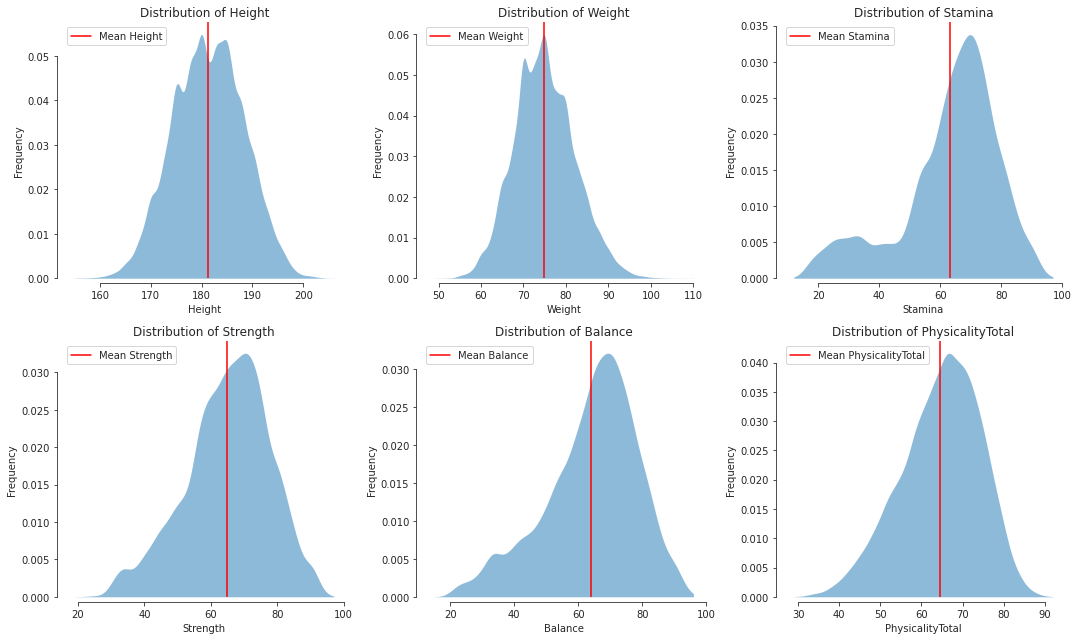

In [48]:
f = plt.figure(figsize=(20, 9))
gs = f.add_gridspec(2, 4)

with sns.axes_style("white"):
    sns.set_style("ticks")
    x = 0
    y = 0
    for attr in physical_attributes:
        ax = f.add_subplot(gs[x, y])
        # sns.histplot(data=df, x=attr, bins=25, kde=True);
        sns.kdeplot(data=df, x=attr, cut=0, fill=True, palette="crest", linewidth=0, alpha=.5);
        plt.title(f"Distribution of {attr}");
        plt.axvline(x=np.mean(df[attr]),c='red',label=f'Mean {attr}')
        plt.xlabel(attr);
        plt.ylabel("Frequency");
        plt.legend(loc="upper left")
        sns.despine(trim=True, offset=5)
        y+=1
        if (y % 3) == 0:
            y = 0
            x +=1

f.tight_layout()



---



**(2) 중복값 제거**

In [8]:
# 중복값 확인하기
dupli = df.duplicated() 
len(dupli[dupli==True])

73

In [9]:
# 중복값 제거하기
df.drop_duplicates(inplace=True)



---



**(3) 20살 이하 유망주 중에서 잠재성이 높은 선수 찾기.**

=> 'Name', 'Age', 'Overall', 'Potential', 'Growth', 'BestPosition', 'ValueEUR', 'ReleaseClause'의 칼럼이 중요하다.

In [10]:
# 나이가 20살 이하인 선수들을 'Potential'기준으로 정렬하기
tmp = df[['Name', 'Age', 'Overall', 'Potential', 'BestPosition','Positions', 'ValueEUR', 'ReleaseClause', 'Nationality','Club']]
under_twenty = tmp[tmp['Age'] <= 20].sort_values('Potential', ascending=False)

# 'Potential'상위 100명을 WonderKids변수에 저장
WonderKids = under_twenty[:100]
display(WonderKids.head(2),WonderKids.tail(2))

,Name,Age,Overall,Potential,BestPosition,Positions,ValueEUR,ReleaseClause,Nationality,Club
22,E. Haaland,20,88,93,ST,ST,137500000,244100000,Norway,Borussia Dortmund
292,Pedri,18,81,91,CAM,CM,54000000,121500000,Spain,FC Barcelona


,Name,Age,Overall,Potential,BestPosition,Positions,ValueEUR,ReleaseClause,Nationality,Club
2734,R. Aït Nouri,20,73,84,LWB,"LWB,LB",6500000,13700000,France,Wolverhampton Wanderers
1742,W. Saliba,20,75,84,CB,CB,11500000,0,France,Olympique de Marseille


In [11]:
# 시각화 실시하기
WonderKids[['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR', 'ReleaseClause','Nationality','Club']].style.background_gradient(cmap='cool')

,Name,Age,Overall,Potential,BestPosition,ValueEUR,ReleaseClause,Nationality,Club
22,E. Haaland,20,88,93,ST,137500000,244100000,Norway,Borussia Dortmund
292,Pedri,18,81,91,CAM,54000000,121500000,Spain,FC Barcelona
397,Vinícius Jr.,20,80,90,RM,46500000,104600000,Brazil,Real Madrid
1292,Ansu Fati,18,76,90,LW,17500000,46800000,Spain,FC Barcelona
796,R. Gravenberch,19,78,90,CAM,33000000,52800000,Netherlands,Ajax
213,A. Davies,20,82,89,LB,57000000,105500000,Canada,FC Bayern München
572,J. Bellingham,18,79,89,CM,37000000,70300000,England,Borussia Dortmund
788,F. Wirtz,18,78,89,CAM,29500000,56100000,Germany,Bayer 04 Leverkusen
791,E. Camavinga,18,78,89,CM,29500000,66400000,France,Real Madrid
795,M. Greenwood,19,78,89,CAM,30500000,62500000,England,Manchester United


In [12]:
# 컬럼 간 상관관계 분석 
WonderKids[['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR', 'ReleaseClause']].corr().style.background_gradient(cmap='cool')

,Age,Overall,Potential,ValueEUR,ReleaseClause
Age,1.000000,0.512137,0.090671,0.280190,0.240286
Overall,0.512137,1.000000,0.706457,0.770035,0.744659
Potential,0.090671,0.706457,1.000000,0.780541,0.776067
ValueEUR,0.280190,0.770035,0.780541,1.000000,0.965508
ReleaseClause,0.240286,0.744659,0.776067,0.965508,1.000000


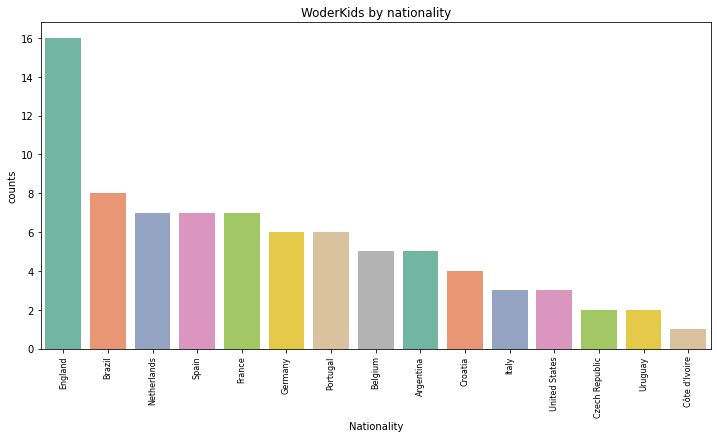

In [13]:
# 원더키드를 많이 보유한 상위 15개 국가 출력
WonderKids_national = WonderKids.Nationality.value_counts()[:15]  # =>'England', 'Brazil', 'Netherlands', 'Spain', 'France', 'Germany','Portugal', 'Argentina', 'Belgium', 'Croatia', 'United States', 'Italy','Czech Republic', 'Uruguay', 'Norway'
f, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x = WonderKids_national.index, y=WonderKids_national.values, data = WonderKids, palette='Set2')
ax.set_title("WoderKids by nationality")
ax.set_xlabel("Nationality")
ax.set_ylabel("counts")
plt.xticks(fontsize=8, rotation=90);
plt.show()

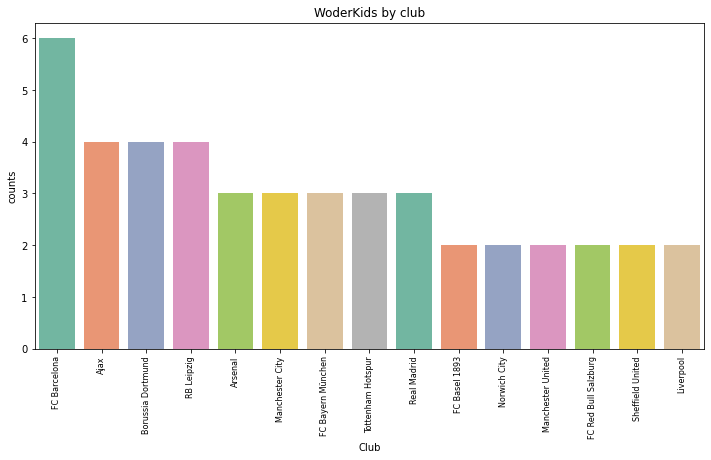

In [14]:
# 원더키드를 많이 보유한 상위 15개 구단 출력
WonderKids_club = WonderKids.Club.value_counts()[:15]  # =>'England', 'Brazil', 'Netherlands', 'Spain', 'France', 'Germany','Portugal', 'Argentina', 'Belgium', 'Croatia', 'United States', 'Italy','Czech Republic', 'Uruguay', 'Norway'
f, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x = WonderKids_club.index, y=WonderKids_club.values, data = WonderKids, palette='Set2')
ax.set_title("WoderKids by club")
ax.set_xlabel("Club")
ax.set_ylabel("counts")
plt.xticks(fontsize=8, rotation=90);
plt.show()

**포지션 별 원더키드 출력**

In [15]:
Position_values = [ 'ST','CF',"LW","RW","CAM","LM",'RM',"CM",'CDM','LWB','RWB','LB','RB','CB','GK']

In [16]:
# python 라이브러리를 사용하여 HTML 형식으로 저장.
from IPython.display import display, HTML

printing_cols =['Name', 'Age', 'Overall', 'Potential', 'Positions', 'Club' ,'ValueEUR', 'ReleaseClause']
for pos in Position_values:
    print(f'Best Wonderkids {pos}')
    display(HTML(WonderKids[WonderKids.BestPosition == pos][printing_cols].head(5).to_html()))
    print('\n\n')

Best Wonderkids ST


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
22,E. Haaland,20,88,93,ST,Borussia Dortmund,137500000,244100000
1301,A. Hložek,18,76,87,"ST,LM,RM",Sparta Praha,16000000,38400000
7006,B. Šeško,18,68,86,ST,FC Red Bull Salzburg,3100000,6600000
4129,S. Giménez,20,71,86,"ST,CF,CAM",Cruz Azul,4500000,10500000
2776,A. Sima,20,73,86,"RM,ST",Stoke City,7500000,0





Best Wonderkids CF


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause





Best Wonderkids LW


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
1292,Ansu Fati,18,76,90,LW,FC Barcelona,17500000,46800000





Best Wonderkids RW


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause





Best Wonderkids CAM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
292,Pedri,18,81,91,CM,FC Barcelona,54000000,121500000
796,R. Gravenberch,19,78,90,"CM,CDM",Ajax,33000000,52800000
788,F. Wirtz,18,78,89,"CAM,CM",Bayer 04 Leverkusen,29500000,56100000
795,M. Greenwood,19,78,89,"RM,ST",Manchester United,30500000,62500000
3017,R. Cherki,17,73,88,"RW,LW",Olympique Lyonnais,7000000,17700000





Best Wonderkids LM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
390,B. Saka,19,80,88,"RM,LM,LB",Arsenal,45500000,95600000
8965,Kayky,18,66,87,RW,Manchester City,2700000,7700000
6904,S. Biuk,18,68,85,"LM,LW",Hajduk Split,3100000,8800000





Best Wonderkids RM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
397,Vinícius Jr.,20,80,90,LW,Real Madrid,46500000,104600000
1294,Gabriel Martinelli,20,76,88,"LM,LW",Arsenal,18000000,37800000
2100,C. Tzolis,19,74,87,"LM,RM,ST",Norwich City,10000000,26300000
2109,P. De la Vega,20,74,86,"RW,LW,RM",Club Atlético Lanús,10000000,17000000
4892,F. Pellistri,19,70,86,RM,Deportivo Alavés,4099999,0





Best Wonderkids CM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
572,J. Bellingham,18,79,89,"CM,LM",Borussia Dortmund,37000000,70300000
791,E. Camavinga,18,78,89,"CM,CDM",Real Madrid,29500000,66400000
4639,N. Rovella,19,70,87,"CM,CDM",Genoa,4099999,0
3411,B. Gilmour,20,72,86,"CM,CDM",Norwich City,5500000,0
7511,A. Vranckx,18,67,85,"CM,CDM",VfL Wolfsburg,2600000,6000000





Best Wonderkids CDM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
1678,O. Skipp,20,75,85,"CDM,CM",Tottenham Hotspur,11500000,24200000
6409,D. Ayala,18,68,84,CDM,Estudiantes de La Plata,2900000,6200000





Best Wonderkids LWB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
789,Nuno Mendes,19,78,88,"LWB,LB,LM",Paris Saint-Germain,29000000,0
2734,R. Aït Nouri,20,73,84,"LWB,LB",Wolverhampton Wanderers,6500000,13700000





Best Wonderkids RWB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
2299,J. Bogle,20,74,85,"RWB,RB",Sheffield United,9000000,18900000





Best Wonderkids LB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
213,A. Davies,20,82,89,"LB,LM",FC Bayern München,57000000,105500000
6878,L. Netz,18,68,85,"LB,LM",Borussia Mönchengladbach,2900000,6700000





Best Wonderkids RB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
2553,D. Rensch,18,73,85,RB,Ajax,7000000,11200000





Best Wonderkids CB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
1751,J. Gvardiol,19,75,87,"CB,LB",RB Leipzig,12500000,23800000
7833,L. Stergiou,19,67,86,CB,FC St. Gallen,2500000,5200000
790,W. Fofana,20,78,86,CB,Leicester City,29000000,60900000
1740,J. Timber,20,75,86,"CB,RB",Ajax,11500000,18400000
1008,Eric García,20,77,86,CB,FC Barcelona,21500000,48400000





Best Wonderkids GK


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
4069,M. Vandevoordt,19,71,87,GK,KRC Genk,4300000,9100000
16735,C. Chatzigavriel,17,58,84,GK,Free agent,0,0




---



**(4) 각 포지션 별 월드 베스트 11 선수 출력**

In [17]:
# 현재 폼이 가장 좋은 선수들을 'Overall' 기준으로 정렬하기
tmp = df[['Name', 'Age', 'Overall', 'Potential', 'BestPosition','Positions', 'ValueEUR', 'ReleaseClause', 'Nationality','Club']]
WorldBest = tmp[tmp['Overall'] >= 81].sort_values('Overall', ascending=False)
display(WorldBest.head(2),WorldBest.tail(2))

,Name,Age,Overall,Potential,BestPosition,Positions,ValueEUR,ReleaseClause,Nationality,Club
0,L. Messi,34,93,93,RW,"RW,ST,CF",78000000,144300000,Argentina,Paris Saint-Germain
1,R. Lewandowski,32,92,92,ST,ST,119500000,197200000,Poland,FC Bayern München


,Name,Age,Overall,Potential,BestPosition,Positions,ValueEUR,ReleaseClause,Nationality,Club
311,Sergi Roberto,29,81,81,RB,"RB,CM,RM",22500000,46100000,Spain,FC Barcelona
387,D. Calvert-Lewin,24,81,85,ST,ST,37500000,74100000,England,Everton


In [18]:
WorldBest.shape

(388, 10)

In [19]:
Position_values = ['ST','CF',"LW","RW","CAM","LM",'RM',"CM",'CDM','LWB','RWB','LB','RB','CB','GK']

# python 라이브러리를 사용하여 HTML 형식으로 저장.
from IPython.display import display, HTML

printing_cols =['Name', 'Age', 'Overall', 'Potential', 'Positions', 'Club' ,'ValueEUR', 'ReleaseClause']
for pos in Position_values:
    print(f'World Best {pos}')
    display(HTML(WorldBest[WorldBest.BestPosition == pos][printing_cols].head(5).to_html()))
    print('\n\n')

World Best ST


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
1,R. Lewandowski,32,92,92,ST,FC Bayern München,119500000,197200000
2,K. Mbappé,22,91,95,"ST,LW",Paris Saint-Germain,194000000,373500000
6,Cristiano Ronaldo,36,91,91,"ST,LW",Manchester United,45000000,83300000
8,H. Kane,27,90,90,ST,Tottenham Hotspur,129500000,246100000
26,R. Lukaku,28,88,88,ST,Chelsea,93500000,173000000





World Best CF


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
11,K. Benzema,33,89,89,"CF,ST",Real Madrid,66000000,135300000
84,Roberto Firmino,29,85,85,CF,Liverpool,54000000,99900000
82,M. Depay,27,85,86,"CF,LW,CAM",FC Barcelona,63000000,133900000
123,D. Mertens,34,84,84,"CF,ST,CAM",Napoli,20500000,34900000
132,W. Ben Yedder,30,84,84,ST,AS Monaco,41500000,78900000





World Best LW


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
5,Neymar Jr,29,91,91,"LW,CAM",Paris Saint-Germain,129000000,238700000
16,S. Mané,29,89,89,LW,Liverpool,101000000,186900000
24,R. Sterling,26,88,89,"LW,RW",Manchester City,107500000,206900000
61,L. Insigne,30,86,86,"LW,CF",Napoli,65500000,111400000
90,Oyarzabal,24,85,89,"LW,RW",Real Sociedad,77500000,168600000





World Best RW


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
0,L. Messi,34,93,93,"RW,ST,CF",Paris Saint-Germain,78000000,144300000
21,M. Salah,29,89,89,RW,Liverpool,101000000,186900000
37,A. Di María,33,87,87,"RW,LW",Paris Saint-Germain,49500000,91600000
57,R. Mahrez,30,86,86,"RW,RM",Manchester City,65500000,121200000
102,H. Ziyech,28,84,84,"RW,CAM",Chelsea,42500000,78600000





World Best CAM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
23,Bruno Fernandes,26,88,89,CAM,Manchester United,107500000,206900000
45,J. Sancho,21,87,91,"RM,CF,LM",Manchester United,116500000,224300000
42,P. Dybala,27,87,88,"CF,CAM",Juventus,93000000,160400000
39,T. Müller,31,87,87,"CAM,RM,RW",FC Bayern München,66000000,108900000
50,Bernardo Silva,26,86,87,"CAM,CM,RW",Manchester City,80000000,154000000





World Best LM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
13,H. Son,28,89,89,"LM,CF,LW",Tottenham Hotspur,104000000,197600000
60,K. Coman,25,86,87,"LM,RM,LW",FC Bayern München,81000000,139700000
100,Y. Carrasco,27,84,84,"LM,ST",Atlético Madrid,45000000,92300000
101,F. Kostić,28,84,84,"LM,LWB",Eintracht Frankfurt,42500000,72300000
170,O. Dembélé,24,83,88,RW,FC Barcelona,55000000,116900000





World Best RM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
87,S. Gnabry,25,85,86,"RM,LM,RW",FC Bayern München,64500000,111300000
173,Ronaldo Cabrais,29,83,83,"CAM,RM",Grêmio,35500000,67500000
275,G. Bale,31,82,82,"RM,RW",Real Madrid,25000000,51300000
265,J. Corona,28,82,82,"RM,RB,RW",FC Porto,30500000,61000000
208,Rafa,28,82,82,"RM,LM",SL Benfica,30500000,61000000





World Best CM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
4,K. De Bruyne,30,91,91,"CM,CAM",Manchester City,125500000,232200000
27,T. Kroos,31,88,88,CM,Real Madrid,75000000,153800000
46,L. Goretzka,26,87,88,"CM,CDM",FC Bayern München,93000000,160400000
43,M. Verratti,28,87,87,"CM,CAM",Paris Saint-Germain,79500000,147100000
41,P. Pogba,28,87,87,"CM,LM",Manchester United,79500000,147100000





World Best CDM


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
7,N. Kanté,30,90,90,"CDM,CM",Chelsea,100000000,185000000
18,J. Kimmich,26,89,90,"CDM,RB",FC Bayern München,108000000,186300000
14,Casemiro,29,89,89,CDM,Real Madrid,88000000,180400000
62,Sergio Busquets,32,86,86,"CDM,CM",FC Barcelona,45000000,92300000
48,Rodri,25,86,89,CDM,Manchester City,81000000,155900000





World Best LWB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
182,Gayà,26,83,86,"LB,LWB,LM",Valencia CF,43500000,94600000
178,R. Gosens,26,83,83,"LWB,LB,LM",Atalanta,36000000,61200000
175,F. Mendy,26,83,86,LB,Real Madrid,43500000,92400000
154,L. Spinazzola,28,83,83,"LWB,LB,LM",Roma,33000000,56100000
212,B. Chilwell,24,82,86,"LWB,LB",Chelsea,40500000,78000000





World Best RWB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
174,A. Wan-Bissaka,23,83,87,RB,Manchester United,48500000,93400000
349,K. Laimer,24,81,85,"CDM,CM,RB",RB Leipzig,33500000,59500000
364,H. Hateboer,27,81,81,"RWB,RB,RM",Atalanta,25000000,42500000
291,R. James,21,81,86,"RWB,RB",Chelsea,37000000,71200000
285,M. Lazzari,27,81,81,RWB,Lazio,25000000,42500000





World Best LB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
44,A. Robertson,27,87,88,LB,Liverpool,83500000,160700000
64,Jordi Alba,32,86,86,"LB,LM",FC Barcelona,47000000,96400000
133,L. Digne,27,84,84,LB,Everton,40500000,77000000
119,L. Shaw,25,84,86,LB,Manchester United,48500000,93400000
116,T. Hernández,23,84,90,LB,Milan,62500000,118800000





World Best RB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
32,T. Alexander-Arnold,22,87,92,RB,Liverpool,114000000,219500000
53,João Cancelo,27,86,87,"RB,LB",Manchester City,71500000,137600000
93,A. Hakimi,22,85,88,"RB,RWB",Paris Saint-Germain,69500000,133800000
85,Carvajal,29,85,85,RB,Real Madrid,47500000,97400000
71,K. Walker,31,85,85,RB,Manchester City,39000000,72200000





World Best CB


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
15,V. van Dijk,29,89,89,CB,Liverpool,86000000,159100000
29,Sergio Ramos,35,88,88,CB,Paris Saint-Germain,24000000,44400000
30,Rúben Dias,24,87,91,CB,Manchester City,102500000,197300000
31,Marquinhos,27,87,90,"CB,CDM",Paris Saint-Germain,90500000,174200000
67,G. Chiellini,36,86,86,CB,Juventus,12000000,19800000





World Best GK


,Name,Age,Overall,Potential,Positions,Club,ValueEUR,ReleaseClause
3,J. Oblak,28,91,93,GK,Atlético Madrid,112000000,238000000
9,M. ter Stegen,29,90,92,GK,FC Barcelona,99000000,210400000
10,M. Neuer,35,90,90,GK,FC Bayern München,13500000,22300000
20,G. Donnarumma,22,89,93,GK,Paris Saint-Germain,119500000,230000000
17,Ederson,27,89,91,GK,Manchester City,94000000,181000000




---



**(5) 가장 가치가 높은 구단**

In [20]:
tmp = df[['Name', 'ValueEUR', 'Club']].sort_values('ValueEUR', ascending=False)
Club_price = tmp[tmp['ValueEUR'] != 0]

In [21]:
Club_price = Club_price.groupby('Club').sum().sort_values(by='ValueEUR',ascending=False)[:15]
display(Club_price)

,ValueEUR
Club,
Manchester City,1299510000
Paris Saint-Germain,1227400000
Liverpool,1046375000
Manchester United,1008730000
Real Madrid,987575000
FC Bayern München,969475000
Atlético Madrid,952475000
Chelsea,934150000
FC Barcelona,834300000


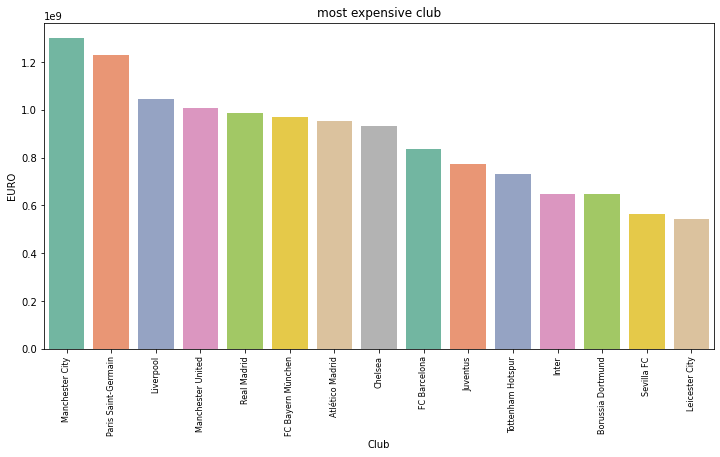

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x = Club_price.index, y=Club_price.ValueEUR, data = Club_price, palette='Set2')
ax.set_title("most expensive club")
ax.set_xlabel("Club")
ax.set_ylabel("EURO")
plt.xticks(fontsize=8, rotation=90);
plt.show()



---



***(6) 자유 계약(fa) 선수 베스트 11*** 

In [42]:
# 계약기간이 얼마남지 않은 선수들을 추출하여, 'Overall'기준으로 내림차순으로 정렬
tmp = df[df.ContractUntil < 2022][['Name', 'Age', 'Overall', 'Potential','BestPosition','Positions', 'ContractUntil', 'WageEUR']]
free_agents = tmp[tmp['Overall'] >= 70].sort_values('Overall', ascending=False)
display(free_agents.shape)
display(free_agents.head(10),free_agents.tail(2))

(321, 8)

,Name,Age,Overall,Potential,BestPosition,Positions,ContractUntil,WageEUR
306,Nani,34,81,81,LW,"LW,LM",2021.0,14000
331,Marlos,33,81,81,CAM,"CAM,RM",2021.0,2000
436,C. Bakambu,30,80,80,ST,ST,2021.0,30000
501,Pozuelo,29,80,80,CAM,"CAM,ST",2021.0,13000
629,R. Ruidíaz,30,79,79,ST,ST,2021.0,13000
652,B. Matuidi,34,79,79,CDM,"CDM,CM",2021.0,11000
653,M. Dembélé,33,79,79,CM,"CM,CAM,CDM",2021.0,21000
786,J. Hernández,33,78,78,ST,ST,2021.0,12000
824,Júnior Moraes,34,78,78,ST,ST,2021.0,1000
703,S. Sosa,34,78,78,GK,GK,2021.0,12000


,Name,Age,Overall,Potential,BestPosition,Positions,ContractUntil,WageEUR
4808,G. Lanaro,35,70,70,CB,CB,2021.0,500
5457,E. Papa,39,70,70,LB,"LB,LWB,CDM",2021.0,4000


In [44]:
Position_values = ['ST','CF',"LW","RW","CAM","LM",'RM',"CM",'CDM','LWB','RWB','LB','RB','CB','GK']

printing_cols =['Name', 'Age', 'Overall', 'Potential', 'Positions', 'ContractUntil', 'WageEUR']
for pos in Position_values:
    print(f'Best FA {pos}')
    display(HTML(free_agents[free_agents.BestPosition == pos][printing_cols].head(5).to_html()))
    print('\n\n')


Best FA ST


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
436,C. Bakambu,30,80,80,ST,2021.0,30000
629,R. Ruidíaz,30,79,79,ST,2021.0,13000
786,J. Hernández,33,78,78,ST,2021.0,12000
824,Júnior Moraes,34,78,78,ST,2021.0,1000
1099,G. Moreno,35,77,77,"ST,CAM",2021.0,15000





Best FA CF


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
3012,Muriqui,35,73,73,"CF,LM",2021.0,7000
4053,Dentinho,32,71,71,ST,2021.0,750
4138,A. Ocanto,32,71,71,"ST,RW,LW",2021.0,550
4693,T. Viudez,31,70,70,"ST,RM",2021.0,500





Best FA LW


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
306,Nani,34,81,81,"LW,LM",2021.0,14000
2722,J. Kouassi,26,73,74,"LW,LM,ST",2021.0,12000
4434,A. Pellegrino,31,71,71,LW,2021.0,5000
5230,Serginho,36,70,70,"LW,LM,ST",2021.0,600
4752,Gerso,30,70,70,"LW,RW",2021.0,5000





Best FA RW


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
1946,M. Meza,28,75,75,"RW,CAM,LM",2021.0,47000
1631,J. Russell,31,75,75,RW,2021.0,10000
2920,D. Quintero,33,73,73,"CAM,LW,LM",2021.0,8000
3820,I. Tajouri-Shradi,27,72,72,"RW,RM",2021.0,7000
4235,A. Ibargüen,29,71,71,"LM,CAM",2021.0,15000





Best FA CAM


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
331,Marlos,33,81,81,"CAM,RM",2021.0,2000
501,Pozuelo,29,80,80,"CAM,ST",2021.0,13000
1074,D. Valeri,35,77,77,"CAM,ST",2021.0,7000
1112,E. Cardona,28,77,77,"CAM,LW,LM",2021.0,19000
1457,D. Díaz,35,76,76,CAM,2021.0,1000





Best FA LM


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
1114,S. Blanco,33,77,77,"LM,CF",2021.0,10000
1920,Ivo,34,75,75,CM,2021.0,15000
1556,Pedro Santos,33,75,75,"LM,CAM,RM",2021.0,9000
2337,C. de Pena,29,74,74,LM,2021.0,1000
2667,R. Lod,28,73,73,"LM,CF,CAM",2021.0,8000





Best FA RM


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
676,A. Mena,33,78,78,"RM,RW",2021.0,28000
971,O. Pineda,25,77,80,"RM,RW,CM",2021.0,56000
1392,R. Sambueza,37,76,76,"RM,CAM,RW",2021.0,16000
1963,Y. Chará,30,75,75,"RM,LM,CM",2021.0,9000
1885,J. Fuenzalida,36,75,75,"RW,RB,RM",2021.0,1000





Best FA CM


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
653,M. Dembélé,33,79,79,"CM,CAM,CDM",2021.0,21000
1076,J. dos Santos,31,77,77,"CM,CDM",2021.0,10000
2194,O. Selnæs,26,74,75,"CM,CDM",2021.0,12000
3036,F. Mancuello,32,73,73,CM,2021.0,18000
2954,O. Akhmedov,33,73,73,"CM,CDM",2021.0,9000





Best FA CDM


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
652,B. Matuidi,34,79,79,"CDM,CM",2021.0,11000
1323,G. Giménez,29,76,76,"CDM,CM",2021.0,9000
1543,C. Pellerano,39,75,75,"CDM,CM",2021.0,700
1532,D. Chará,35,75,75,"CDM,CM",2021.0,6000
2304,F. Rinaudo,34,74,74,"CDM,CM",2021.0,14000





Best FA LWB


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR





Best FA RWB


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR





Best FA LB


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
1504,L. Vangioni,34,75,75,LB,2021.0,1000
2421,J. Sánchez Miño,31,74,74,"LB,CM,LM",2021.0,11000
2985,E. Mas,32,73,73,LB,2021.0,7000
2487,J. Dueñas,32,73,73,"LB,CM,RB",2021.0,31000
3645,R. Hollingshead,30,72,72,"LB,RB,CB",2021.0,6000





Best FA RB


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
1552,I. Piris,32,75,75,"RB,LB",2021.0,1000
2265,R. López,28,74,74,"RB,RWB",2021.0,19000
2891,L. Godoy,26,73,76,"RB,RWB",2021.0,12000
2616,S. Otálvaro,34,73,73,RB,2021.0,1000
3571,F. Torrent,29,72,72,RB,2021.0,12000





Best FA CB


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
1395,J. Pinola,38,76,76,CB,2021.0,11000
1183,Y. Gómez Andrade,29,76,77,CB,2021.0,9000
1965,A. Long,28,75,77,CB,2021.0,9000
1949,G. Cabral,35,75,75,CB,2021.0,12000
1571,C. Lema,31,75,75,CB,2021.0,14000





Best FA GK


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
703,S. Sosa,34,78,78,GK,2021.0,12000
1789,K. Nordfeldt,32,75,75,GK,2021.0,7000
1773,M. Silva,38,75,75,GK,2021.0,600
1487,L. Mejía,30,75,75,GK,2021.0,600
1996,E. Room,32,74,74,GK,2021.0,6000




---



**(7)  H. Son vs R. Sterling**

In [55]:
import plotly.graph_objects as go

labels=np.array(['Overall','ShootingTotal','PassingTotal','DribblingTotal','PhysicalityTotal','Crossing','SprintSpeed','Balance'])
stats=df.loc[2, labels].values


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='H. Son'
))

stats=df.loc[36, labels].values

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='R. Sterling'
))

fig.update_layout(
    autosize=False,
    width=700,
    height=700,)

fig.show()



---

